**Machine Learning Linear Regrassion using some fake values**

In [129]:
import numpy as np
import matplotlib.pyplot as plt


Genarate Some Fake Value
x and y
And Their relation is y = 2x+1

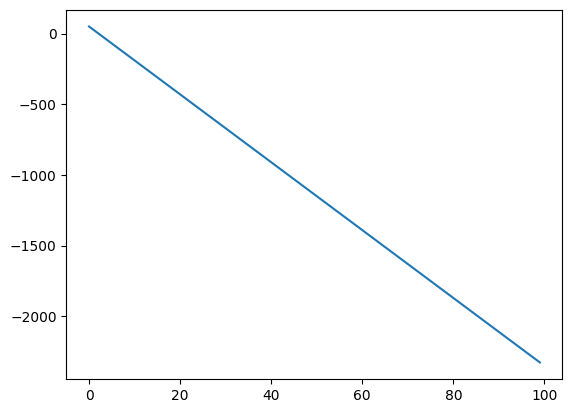

In [130]:
x = np.arange(100)
y =  3*x+2*x+(x+50)-30*x

plt.plot(x,y)
# plt.show()


Real Life Data  must have noise

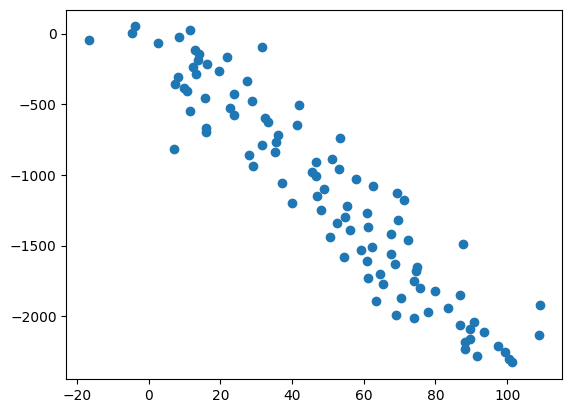

In [131]:
noise = np.random.randn(100)*10
noise.std()
x= x+noise
plt.scatter(x,y)
plt.show()

Normalized The Data
Stadnratization Formula  x = (x-x.mean())/x.std()

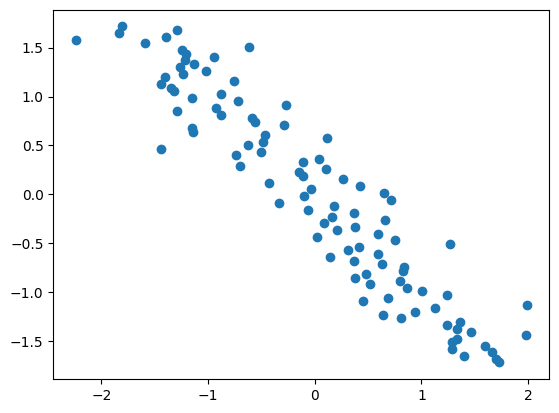

In [132]:
x = (x-x.mean())/x.std()
y = (y - y.mean()) / y.std()
plt.scatter(x,y)
plt.show()

Example of arra[:,0] external


In [133]:
arra = [
    [1,2],
    [2,4],
    [4,7]
]

np_array = np.array(arra)

np_array[:,1]

array([2, 4, 7])

Divide The Dataset 80%

In [134]:

def trainingtestSpliter(x, y, split=0.8):

    alldata = np.zeros((x.shape[0], 2))
    alldata[:, 0] = x
    alldata[:, 1] = y
    np.random.shuffle(alldata)

    split_index = int(split * alldata.shape[0])

    x_train = alldata[:split_index, 0]
    x_test = alldata[split_index:, 0]
    y_train = alldata[:split_index, 1]
    y_test = alldata[split_index:, 1]

    return x_train, x_test, y_train, y_test






 Plot the different

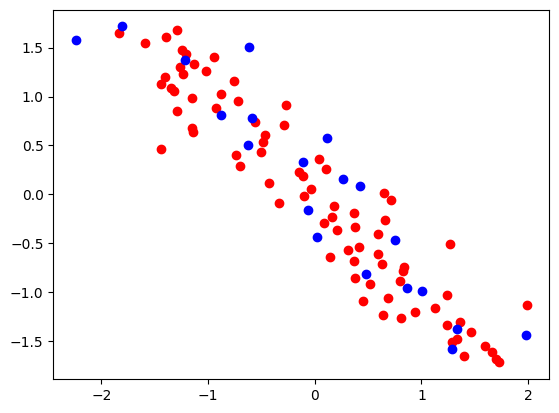

In [135]:
xtr, xte, ytr, yte = trainingtestSpliter(x, y)

plt.scatter(xtr,ytr,color="red")
plt.scatter(xte,yte,color="blue")
plt.show()

In [136]:
#Hypotesis
def Hypo(x,theta):
  return theta[0]+theta[1]*x

def error(x,y,theta):
  m = x.shape[0]
  e = 0
  for i in range(m):
    NewY = Hypo(x[i],theta)
    e = e + (NewY-y[i])**2
  return e/(2*m)


def gradient(x,y,theta):
    m = x.shape[0]
    grad = np.zeros((2,))

    for i in range(m):
      exp = Hypo(x[i],theta) - y[i]
      grad[0] += (exp)
      grad[1] += (exp)*x[i]
    return grad/m


def train(x,y,lr = 0.01, iterations = 100):
  theta = np.zeros((2,))

  errorList = []
  for i in range(iterations):
     grad = gradient(x,y,theta)
     errorList.append(error(x,y,theta))
     theta[0] = theta[0] - lr*grad[0]
     theta[1] = theta[1] - lr*grad[1]
  plt.title('Error over iterations')
  plt.plot(errorList)
  plt.show()


  return theta

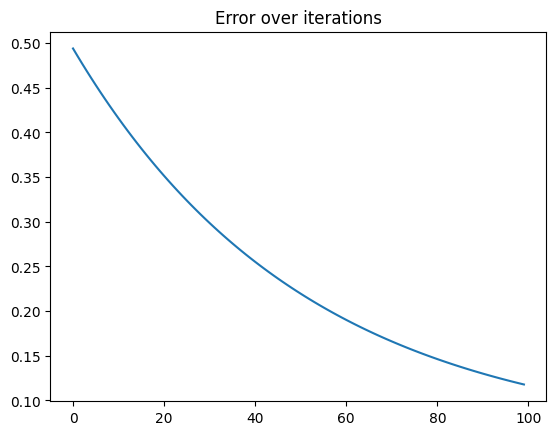

array([-0.01082812, -0.59273406])

In [137]:
theta = train(xtr,ytr)
theta

In [138]:
def predic(x,theta):
    return Hypo(x,theta)

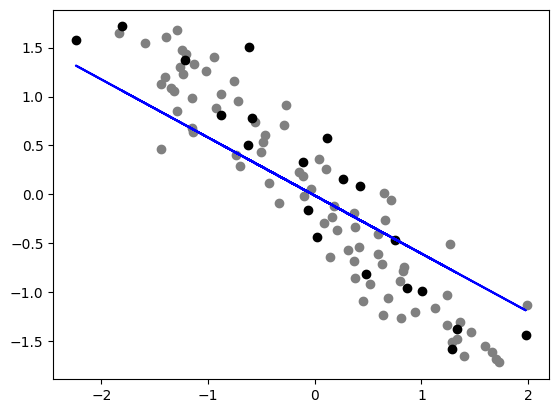

In [139]:
predicted_y = predic(xte,theta)

plt.scatter(xtr,ytr,color="gray")
plt.scatter(xte,yte,color="black");
plt.plot(xte,predicted_y, color= "blue")
plt.show()

# Amr traning data kande
# Test data  Chande
# best fit line  Gange

In [142]:

def r2score(y,y_pred):
  ymean = y.mean()
  allnum = np.sum((y-y_pred)**2)
  allden = np.sum((y-ymean)**2)
  return 1-(allnum/allden)

print(str(int(r2score(yte,predicted_y)*100))+"%")

75%
